### Exploratory Data Analysis 



The HOUSES dataset contains a collection of recent real estate listings in San Luis Obispo county and around it. The dataset is as a CSV file. The dataset contains the following fields:

1. MLS: Multiple listing service number for the house (unique ID).
2. Location: city/town where the house is located. Most locations are in San Luis Obispo county and northern Santa Barbara county (Santa Maria-Orcutt, Lompoc, Guadelupe, Los Alamos), but there some out of area locations as well.
4. Price: the most recent listing price of the house (in dollars).
5. Bedrooms: number of bedrooms.
6. Bathrooms: number of bathrooms.
7. Size: size of the house in square feet.
8. Price/SQ.ft: price of the house per square foot.
9. Status: type of sale. Thee types are represented in the dataset: Short Sale, Foreclosure and Regular.

Lets import the required libraries that we will be using later. 

In [2]:
from numpy import *
import pandas as pd 

Let's load the dataset into a pandas dataframe and have a look at the headers.

In [3]:
df = pd.read_csv('data.csv', sep=',', error_bad_lines=False) # read fie as a dataframe

print len(df)    # print number of rows
print list(df)   # print 1st ten headers

781
['MLS', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Size', 'Price/SQ.Ft', 'Status']


Lets take a look at the first 2 rows of the dataframe.

In [17]:
df.head(2)

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale


Next, lets look at a specific column or feature in the dataframe.

In [4]:
print "Bedrooms:", df.Bedrooms.unique()
print "Bathrooms:", df.Bathrooms.unique()

Bedrooms: [ 3  4  2  7  1  5  0  6 10]
Bathrooms: [ 3  4  1  2  5  7  6 11]


What if we want to drop a column from the dataframe?

In [119]:
df = df.drop('Location', 1)

Let's rename the first column.

Hint: A Google search for 'python pandas dataframe rename' points you at this documentation (http://pandas-docs.github.io/pandas-docs-travis/).

In [18]:
print df.columns
df.rename(columns={df.columns[0]:'listing id'}, inplace=True)
df.columns

Index([u'MLS', u'Location', u'Price', u'Bedrooms', u'Bathrooms', u'Size',
       u'Price/SQ.Ft', u'Status'],
      dtype='object')


Index([u'listing id', u'Location', u'Price', u'Bedrooms', u'Bathrooms',
       u'Size', u'Price/SQ.Ft', u'Status'],
      dtype='object')

What is the max, min, mean/avg, and standard deviation of the column 'bedroomcnt'?

In [5]:
print "Min: " , min(df['Price/SQ.Ft'])
print "Max: " , max(df['Price/SQ.Ft'])
print "Std: " , df['Price/SQ.Ft'].std()
print "Avg: " , df['Price/SQ.Ft'].mean()



Min:  19.33
Max:  1144.64
Std:  115.082145976
Avg:  213.131293214


Plot the distribution of 'yearbuild' using matplotlib

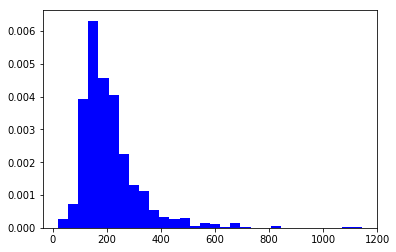

In [13]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

# remove NAN from array
x = df['Price/SQ.Ft'][~np.isnan(df['Price/SQ.Ft'])]

# plot histogram 
n, bins, patches = plt.hist(x, 30, normed=1, facecolor='blue')
plt.show()

One of the best ways to inspect data is visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. 

Since its difficult to visualize more than 2 or 3 features, one possibility is to use a pair plot that looks at all possible pairs of features. The pair plot shows the interaction of each pair of features inorder to visualize any correlation between features. 

(781, 8)


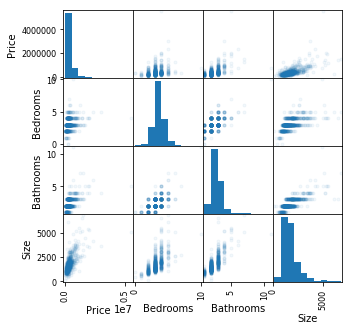

In [15]:
# import the scatter_matrix functionality
import random as rand
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

print df.shape
x = df.iloc[:,[1,2,3,4,5]] # extract only 5 columns from dataframe (using index)
y = x.dropna(thresh=2) # drop any rows that have 2 or more fields as NAN  
a = pd.scatter_matrix(x, alpha=0.05, figsize=(5,5), diagonal='hist')
plt.show()

Let's create a crosstabulation or contingency table of the factors.

Hint: A Google search for 'python pandas cross tabulation' points you at this documentation (http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations).

In [16]:
pd.crosstab(df.Bedrooms, df.Bathrooms)

Bathrooms,1,2,3,4,5,6,7,11
Bedrooms,,,,,,,,
0,2,0,0,0,0,0,0,0
1,10,1,0,0,0,0,0,0
2,33,78,12,0,0,0,0,0
3,20,286,119,5,1,0,0,0
4,0,76,76,19,6,0,0,0
5,0,3,16,9,0,2,1,0
6,0,0,3,0,0,0,1,0
7,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,1


In [37]:
fig=plt.figure()
plt.scatter(df.Price, df.Size)
axis = fig.gca() #get current axis
axis.set_title('Price vs Size')
axis.set_xlabel('Price')
axis.set_ylabel('Size')
fig.canvas.draw()

## Pandas Data Munging

The first concept we deal with here is pandas groupby. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found here (http://pandas-docs.github.io/pandas-docs-travis/).

In [43]:
status_groupby = df.groupby('Status')
status_groupby.head()

,listing id,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale
53,143436,Templeton,1399000,4,3,6500,215.23,Foreclosure
56,143534,Morro Bay,789000,3,3,2100,375.71,Foreclosure
63,144314,Morro Bay,899000,3,3,2430,369.96,Foreclosure
64,144316,Morro Bay,1045000,3,3,2100,497.62,Foreclosure
65,144318,Morro Bay,774000,2,2,1550,499.35,Foreclosure


The function groupby gives you a dictionary-like object, with the keys being the values of the factor, and the values being the corresponding subsets of the dataframe.

In [47]:
# lets print the number of rows per each type of status 
for key, value in status_groupby:
    print "( key, len(value) ) = (", key, ",", len(value), ")"
    v=value

( key, len(value) ) = ( Foreclosure , 162 )
( key, len(value) ) = ( Regular , 103 )
( key, len(value) ) = ( Short Sale , 516 )


The groupby function also acts like an object that can be mapped. After the mapping is complete, the rows are put together (reduced) into a larger dataframe. For example, using the describe function. The documentation of the describe function can be found here (http://pandas-docs.github.io/pandas-docs-travis/).

In [52]:
status_df =status_groupby['Bathrooms','Bedrooms','Price','Size','Price/SQ.Ft'].describe()
print type(status_df)
status_df.head(20)

<class 'pandas.core.frame.DataFrame'>


Bathrooms    Bedrooms         Price         Size  \
Status                                                                 
Foreclosure count  162.000000  162.000000  1.620000e+02   162.000000   
            mean     2.314815    3.216049  3.632146e+05  1762.493827   
            std      0.807359    0.956956  2.701240e+05   880.295908   
            min      1.000000    0.000000  2.900000e+04   628.000000   
            25%      2.000000    3.000000  1.811250e+05  1200.000000   
            50%      2.000000    3.000000  2.789500e+05  1500.000000   
            75%      3.000000    4.000000  4.437250e+05  2064.000000   
            max      7.000000    6.000000  1.799000e+06  6500.000000   
Regular     count  103.000000  103.000000  1.030000e+02   103.000000   
            mean     2.446602    3.048544  6.411621e+05  1926.699029   
            std      0.801080    0.832886  6.752140e+05   826.470618   
            min      1.000000    1.000000  2.650000e+04   120.000000   
            25%      2.000000    3.000000  3.154500e+05  1431.000000   
            50%      2.000000    3.000000  5.090000e+05  1832.000000   
            75%      3.000000    3.000000  7.620000e+05  2237.500000   
            max      6.000000    6.000000  5.499000e+06  5060.000000   
Short Sale  count  516.000000  516.000000  5.160000e+02   516.000000   
            mean     2.350775    3.137597  3.381775e+05  1718.463178   
            std      0.867436    0.825834  2.365197e+05   795.330609   
            min      1.000000    0.000000  4.090000e+04   398.000000   

                   Price/SQ.Ft  
Status                          
Foreclosure count   162.000000  
            mean    200.221605  
            std      97.433947  
            min      19.330000  
            25%     140.050000  
            50%     186.780000  
            75%     225.525000  
            max     686.020000  
Regular     count   103.000000  
            mean    311.406796  
            std     189.019573  
            min      19.720000  
            25%     200.100000  
            50%     282.690000  
            75%     369.740000  
            max    1144.640000  
Short Sale  count   516.000000  
            mean    197.567326  
            std      88.248737  
            min      34.050000

Another way of printing statistics using group by is shown below, without having to iterate through each item in the dataframe. You can find documentation about std function here (http://pandas-docs.github.io/pandas-docs-travis/).

In [57]:

status_df =df.groupby('Status').std()
print status_df

              listing id          Price  Bedrooms  Bathrooms        Size  \
Status                                                                     
Foreclosure  2691.998699  270124.016966  0.956956   0.807359  880.295908   
Regular        71.974328  675214.007648  0.832886   0.801080  826.470618   
Short Sale   4240.579781  236519.660193  0.825834   0.867436  795.330609   

             Price/SQ.Ft  
Status                    
Foreclosure    97.433947  
Regular       189.019573  
Short Sale     88.248737  
